### Проблема генерализации в машинном обучении

Задача машинного обучения заключается в том, чтобы выводить общие закономерности из частных случаев (обучающих примеров). Этот процесс называется обобщением (англ. *generalization*), или индукцией. Однако проблема в том, что из одних и тех же обучающих примеров можно вывести совершенно разные закономерности.

**Пример 1.** Широко известна задача "продолжить числовой ряд". Найти закономерность и прододжить ряд всегда можно разными способами, в том числе очень сложными:

- Продолжить ряд: $1, 2, 3, \ldots$
- Гипотеза: $f(x) = 16*x^3 - 96*x^2 + 177*x - 96$
- Ответ: следующее число $f(4) = 100$

**Пример 2.** У вас есть датасет из изображений, по которому нужно научиться распознавать животных. Могут существовать совершенно разные гипотезы, позволяющие достичь 100%-й точности на конкретной обучающей выборке. Например:
- Гипотеза 1: изображение, в котором пиксель с координатами (10, 20) имеет красный цвет, имеет класс «лев»
- Гипотеза 2: изображение, в котором есть участок с чередованием черных и желтых полос, имеет класс «пчела»
- Гипотеза 3: изображение, на котором присутствуют пальцы рыбака или удочка, имеет класс «рыба»

Конечно нам очевидно, что ни одна из перечисленных гипотез в целом не верна. Однако применение этих гипотез в некоторых случаях может давать высокую точность предсказания на обучающих данных. Из-за этого ML-алгоритмы могут сойтись к решению, использующему такие гипотезы.

> There has been an increase in concern that the black-box nature of these [machine learning] systems can obscure undesirable properties of the decision algorithm, such as illegal bias or signals accidentally learned from artifacts irrelevant to the task at hand. ([Kumar et al., 2020]($Problems with Shapley-value-based explanations as feature importance measures$))

Чтобы справиться с проблемой, можно собрать больше обучающих данных, но это не всегда возможно по нескольким причинам:
1. Примеров может быть доступно немного, например при диагностике редкого заболевания или при распознавнании кибератак.
2. Ручная разметка может быть затратным процессом, например в задаче сегментации.
3. Сколь угодно большой датасет может быть недостаточно разнообразен или содержать систематические ошибки.

**Резюме.** *Среди гипотез, хорошо объясняющих обучающую выборку, есть правдоподобные и неправдоподобные, и ML-алгоритмы имеют риск сойтись к неправдоподобным гипотезам. Проблема усугубляется если обучающих примеров доступно немного или они недостаточно разнообразны*

### Проблема dataset bias и out-of-distribution генерализации

Третья проблема из перечисленных выше особенно сложна: *сколь угодно большой датасет может быть недостаточно разнообразен или содержать систематические ошибки* (англ. *dataset bias*, что можно перевести как "предвзятость набора данных"). Если эта проблема ярко выражена, то ML-алгоритм может дать высокую точность не только при обучении, но и при тестировании, так как часто train и test берутся из одного датасета, но при дальнейшей работе по назначению будет часто ошибаться.

**Пример 1.** Например, при обучении все изображения, где животное стоит под светофором, являются изображениями собак. Это может научить алгоритм тому, что любое животное под светофором - собака. Однако когда алгоритм начнет работать по назначнию, под светофорами будут кошки, и алгоритм станет давать неверные ответы. Выявить и исправить все подобдные проблемы при сборе датасета, вероятно, невозможно.

**Пример 2.** Задача распознавания лиц (идентификации человека по его лицу). В обучающем датасете, даже очень большом, может ни быть ни одного изображения человеческого лица, на которое нанесен некий рисунок. Модель, обученная на таком датасете, научится быть инвариантной к положению лица в кадре и его выражению, и почти безошибочно идентифицировать человека. Однако модель может перестать корректно работать в случае, если на лицо нанесен рисунок, потому что *изображений такого типа не встречалось при обучении*.

Такая ситуация в целом называется data shift: сдвиг в распределении исходных данных между обучением и инференсом. Эта проблема подробно описана в [статье от Yandex]($Shifts: A Dataset of Real Distributional Shift Across Multiple Large-Scale Tasks$). Способность ML-алгоритма хорошо работать в условиях сдвига данных, то есть корректно работать на тех *типах примеров*, которые не встречались при обучении, называется out-of-distribution генерализацией.  Ее достижение является одной из открытых проблем в машинном обучении. Авторы [одной из статей]($Relational inductive biases, deep learning, and graph networks$) так описывают проблему:

> Generalizing beyond one's experiences – a hallmark of human intelligence from infancy – remains a formidable challenge for modern AI.

Еще один простой пример: нейронная сеть, обученная на задаче регрессии $y = \sin(x)$, где $x \in [-10, 10]$, может с высокой точностью предсказывать $y$ для любого значения $x$ в этом интервале (интерполировать), не не сможет корректно продолжить график (экстраполировать), то есть предсказать $y$ для $x$ за пределами этого интервала. Поэтому проблему out-of-distribution генерализации можно называть проблемой экстраполяции.

Частным случаем сдвига данных является утечка данных (подробнее см. в [этом обзоре]($Интерпретация моделей и диагностика сдвига данных: LIME, SHAP и Shapley Flow$)).

**Резюме.** *Оценка точности на тестовой выборке может помочь оценить качество алгоритма, однако такая оценка может оказаться неточной в условии сдвига или утечки данных.*

### Регуляризация

Почему же машинное обучение вообще работает на практике? Неужели ML-алгоритмы достаточно умны, чтобы отделять правдоподобные гипотезы от неправдоподобных? Не всегда. Например, в приведенном выше примере распознавания животных полносвязная нейронная сеть может сойтись к первой гипотезе. Сверточная сеть *из-за особенностей своей архитектуры* уже не может сойтись к первой гипотезе, хотя может сойтись ко второй или третьей. То есть перейдя от полносвязной сети к сверточной мы *отсеяли неправдоподобные решения задачи*, при которых ответ зависит от абсолютных координат пикселей. В целом такой прием называется регуляризацией и является, наряду с оптимизацией, одной из двух главных составляющих машинного обучения. Что же это означает?

Пусть мы имеем размеченный обучающий датасет. Может быть много разных решений, дающих одинаково высокую точность предсказания на датасете (примеры см. в предыдущем разделе). Чтобы выбрать среди них, нужно заранее обладать знаниями о предметной области. При этом некий набор знаний и гипотез мы формулируем [a priori](https://en.wikipedia.org/wiki/A_priori_and_a_posteriori), то есть еще до получения обучающих данных. Вопреки распространенной трактовке, a priori не всегда означает некую аксиому. Это означает *сделанную заранее гипотезу, которая затем корректируется на основе экспериментальных данных, из чего возникает апостериорная гипотеза* (a posteriori - "из последующего", то есть постфактум). Это принцип байесовского вывода. Например: "решение А чуть лучше соответствует данным, чем решение Б, но само по себе решение А менее вероятно, поэтому мы выберем решение Б".

Априорные гипотезы о свойствах исследуемой зависимости (целевых данных от исходных) называются **"inductive priors"**. Понятие "inductive" означает индукцию, то есть обобщение (выведение общих закономерностей из частных случаев - именно в этом задача ML-алгоритма). Понятие "prior" означает априорную гипотезу. Если inductive priors - это гипотезы об интересующей нас задаче, то **"inductive biases"** - это предпочтения тех или иных конкретных свойств обучаемого алгоритма и получаемого решения.

Есть также термин **"регуляризация"**. Часто его понимают в очень узком смысле (L1- и L2-регуляризация весов), однако этот термин еще более широкий, чем inductive priors/inductive biases. Регуляризация в широком смысле означает наложение на обучаемый алгоритм неких (строгих или нестрогих) ограничений с целью получить решение, обладающее желаемыми свойствами, если решение не единственно. Но часто регуляризацию понимают в более узком смысле, как добавление дополнительных слагаемых в функцию потерь.

Примеры inductive priors и регуляризации мы подробнее разберем в следующих разделах.

### Машинное обучение как байесовский вывод

Перед тем, как переходить к конкретным примерам, очень полезно показать связь машинного обучения с теорией вероятностей и байесовским выводом.

Начнем с принципа максимума правдоподобия. Его часто проходят в курсах по статистике. Этот принцип заключается в том, что мы ищем такую гипотезу, при которой наблюдаемое явление (выборка, результат эксперимента) наиболее правдоподобно, то есть имеет наибольшую вероятность. Но теория нужна для применения на практике, поэтому давайте попробуем на практике применть этот принцип.

Ваша жена не вернулась домой - наблюдаемое явление. Существует очень много самых неправдоподобных гипотез, при которых наблюдаемое явление правдоподобно. Например, давайте попробуем оценить кол-во тигров в подъезде от 0 до 10. Чем больше тигров в подъезде, тем больше шанс, что жена не сможет вернуться домой. Значит прицип максимума правдоподобия приведет нас к тому, что в подъезде 10 тигров.

<img src="assets/bayes1.jpg" width="600" align="center">

Точно так же можно прийти к выводу, что в подъезде динозавры, и так далее. Это немного удручает: как же принцип максимума правдоподобия можно применять на практике, если он дает такие результаты?

Чтобы исправить ситуацию, был придуман более общий подход, называемый байесовским выводом. В байсовском выводе гипотезам сопоставляются априорные вероятности, то есть насколько правдоподобными мы считаем те или иные гипотезы еще до того, как проведем эксперимент. Априорная вероятность основывается на предыдущем жизненном опыте. Априорная вероятность того, что тигров больше 0, ничтожна. Чтобы произвести байесовский вывод, нужно умножить априорную вероятность гипотезы $P(H)$ на правдоподобие данных при гипотезе $P(D|H)$. В результате мы получим апостериорные вероятности для каждой гипотезы. Чтобы получить распределение апостериорных вероятностей, нужно произвести нормировку, чтобы сумма апостериорных вероятностей была равна единице. Далее можно действовать разными способами, но самый простой - найти максимум (моду) апостериорной вероятности. Этот максимум в нашем примере находится в значении "0 тигров".

Более формально, байесовский вывод основывается на цепном правиле:

$P(H, D) = P(D, H) = P(H|D)P(D) = P(D|H)P(H)$

Из второго равенства следует формула Байеса:

$P(H|D) = \cfrac{P(D|H)P(H)}{P(D)}$

Мы применяем метод апостериорного максимума: ищем такое $H$, что $P(H|D)$ максимально.

Более подробно об этом я писал в статье [Статистические модели]($Статистические модели$).

<img src="assets/bayes2.jpg" width="600" align="center">

Таким образом, байесовский вывод учитывает априорные вероятности гипотез, которые отражают наш предыдущий жизненный опыт. Заметим, что в случае большого количества или убедительности доказательств мы все таки можем сделать вывод о том, что в поъезде тигры.

Все это непосредственно связано с машинным обучением, поскольку в машинном обучении ситуация аналогичная: мы имеем наблюдения, состоящие из пар $(x_i, y_i)$ и мы хотим из этих частных случаев вывести общее правило, отображающее $X$ в $Y$. Задавая модель, мы задаем пространство поиска и хотим найти оптимальные веса. Принцип апостериорного максимума означает поиск такого решения, которое во-первых хорошо соответствуют обучающим данным, а во-вторых правдоподобно.

Метод максимума правдоподобия - это частный случай метода апостериорного максимума, когда мы присваиваем одинаковые априорные вероятности всем рассматриваемым гипотезам, а всем не рассматриваемым гипотезам присваиваем нулевые априорные вероятности (поэтому апостериорные вероятности тоже будут нулевыми).

Таким образом, машинное обучение можно рассматривать как байесовский вывод, в котором задание априорных гипотез является регуляризацией, а поиск апостериорного максимума осуществляется оптимизацией.

Теперь давайте рассмотрим конкретные априорные гипотезы, выражаемые в способах регуляризации: начиная от самых простых, которые мы часто используем неосознанно, и заканчивая наиболее сложными.

### Гипотеза компактности

В машинном обучении почти всегда основной априорной гипотезой является **гипотеза компактности**. Она предполагает, что **близкие по исходным признакам объекты вероятно близки и по целевому признаку**. Например, в задаче классификации схожие объекты гораздо чаще лежат в одном классе. Иначе говоря, целевая функция в каком-то смысле плавная. Данная формулировка неформальная, формализовать ее можно по-разному. В домене исходных данных нужно ввести некую метрику расстояния, позволяющую сравнивать объекты по близости друг к другу, иначе гипотеза компактности не будет иметь смысла.

*Примечание. Интересно, что в доказательстве [no-free-lunch теоремы]($No-Free-Lunch теорема$) наблюдается прямо противоположное: целевые функции в среднем представляют собой случайный шум, явно несоответствующий гипотезе компактности. Отсюда мы получаем среднюю ошибку 50% при тестировании любого алгоритма.*

Различие между количественным и категориальным признаком в том, что к количественному признаку следует применить гипотезу компактности.

**Практический вывод #1.** Если мы работаем с признаками, которые по смыслу являются количественными, то гипотезу компактности нужно заложить в сам обучаемый алгоритм: небольшое изменение признака ведет к небольшому изменению предсказания. Если количественный признак представлен в компьютере виде числа, то линейные модели, SVM, нейросети, решающие деревья (и вероятно все другие применяемые алгоритмы) исходя из принципа их работы будут соответствовать гипотезе компактности (деревья решений могут не соответствовать лишь в отдельных точках). А значит все хорошо, так и нужно.

Попробуйте в задаче регрессии заменить каждый количественный признак на набор бинарных признаков, означающих отдельные биты при записи этого числа в формате float. Информация при этом не будет потеряна, однако качество обучения нейросети или SVM на таких данных будет существенно хуже. Потому что теперь в алгоритме не реализована гипотеза компактности. Например, нейросеть так устроена, что *небольшое изменение входных данных незначительно меняет ответ*, потому что нейросеть - это композиция непрерывных функций. А это и есть гипотеза компактности, заложенная в сам обучаемый алгоритм.

> Примечание: изредка случается, что небольшое изменение входных данных в нейросети сильно меняет ответ. Речь идет об adversarial examples в нейронных сетях для классификации изображений. Этот феномен описан в статье [Intriguing properties of neural networks](https://arxiv.org/abs/1312.6199) (C. Szegedy et al., 2013) на которую я делал [обзор]($Intriguing properties of neural networks$). В статье авторы как раз и рассуждают о гипотезе компактности (smoothness prior). Это тот случай, когда предиктор не полностью соответствует гипотезе компактности, что является его недостатком.

**Практический вывод #1.** К категориальным признакам не следует применять гипотезу компактности. Все категории (в простом случае) одинаково не равны друг на другу. Именно поэтому категориальные признаки перед обработкой нейронной сетью преобразуются one-hot кодированием. Целевые категориальные признаки также кодируются one-hot кодированием.

Попробуйте в задаче классификации цифр MNIST нейросетью вместо 10 выходных нейронов использовать лишь один выходной нейрон, который непосредственно предсказывает цифру (округляем значение на нем), и использовать функцию потерь MSE. Такая сеть кое-как обучится, но точность будет сильно ниже.

Именно в этом суть отличия задачи **классификации** от **регрессии**. Различие не просто в формате данных: формат мы можем сделать таким, каким захотим. Различие в нашем априорном знании о целевом признаке. В регрессии небольшая ошибка в ответе лучше большой ошибки: при оценке стоимости предсказать 8 вместо 9 лучше, чем предсказать 1 вместо 9. В классификации все классы одинаково непохожи: при распознавании цифр предсказать 8 вместо 9 в той же мере является ошибкой, что и предсказать 1 вместо 9. Эта информация закладывается в архитектуру модели и функцию потерь.

Более подробно об этой теме я писал в статье [Функция потерь как выражение метрики на целевой переменной]($Функция потерь как выражение метрики на целевой переменной$).

### Гипотеза о сложности алгоритмов: бритва Оккама

Описанная выше гипотеза может показаться слишком банальной, как и еще одна: бритва Оккама. Она звучит так: простое объяснение при прочих равных предпочтительнее сложного. Об этом принципе хорошо написано в Википедии:

> "Сам Оккам писал: «Что может быть сделано на основе меньшего числа [предположений], не следует делать, исходя из большего». Бритва Оккама не аксиома, а презумпция, то есть она не запрещает более сложные объяснения в принципе, а лишь рекомендует порядок рассмотрения гипотез, который в большинстве случаев является наилучшим."

В машинном обучении бритва Оккама означает, что на реальных задачах с ростом сложности модели возникает риск переобучения, потому что модель слишком "подгоняется" под обучающие данные. Есть способы формализовать это утверждение, например неравенство Вапника-Червоненкиса (см. [эту статью]($A Tutorial on Support Vector Machines for Pattern Recognition$), раздел 2). Однако это лишь оценка, которая во многих случаях может быть слишком грубой. Например, известно, что нейронные сети даже очень большого размера демонстрируют хорошую обощающую способность (несколько источников по этой теме я приводил в [этом обзоре]($Kernel Methods for Deep Learning$), см. раздел "Нейронные сети бесконечной ширины").

Некоторые задачи явно не решаются простыми алгоритмами, например распознавание изображений.

> “Occam's Razor” – the principle that we should prefer simple to complex models when the latter are not necessary to explain the data – is often held to be an essential component of inductive inference. In scientic contexts, its merits seem clear. In the messy contexts typical of engineering applications, its meaning and utility are less obvious. For example, we do not expect that there is any simple procedure for recognizing handwriting. The shapes of letters are arbitrary; they are written in many styles, whose characteristics are more a matter of fashion than of theory; stains and dirt may appear, and must somehow be recognized as not being part of the letters. Indeed, there is no reason to suppose that there is any limit to the complications involved in this task. It will always be possible to improve
performance at least a bit by taking account of further rare writing styles, by modeling the shapes of the less common forms of ink blots, or by employing a deeper analysis of English prose style in order to make better guesses for smudged letters. ([Bayesian Learning for Neural Networks]($Bayesian Learning for Neural Networks$), R. Neil, 1995)

*Примечание.* Как мне кажется, переобучение не всегда связано с излишней сложностью гипотез. Может быть и наоборот. Простая сверточная сеть распознает леопарда по пятнам на его шкуре, практически игноррируя его форму как объекта. Это отлично работает на обучающем и тестовом датасетах, где кроме леопардов больше нет объектов леопардовой расцветки. Однако, например, леопардовый диван такая сеть распознает как леопарда. Это тоже можно считать переобучением. Подробнее можно почитать здесь и здесь:

- [Внезапный диван леопардовой расцветки](https://habr.com/ru/post/259191/)
- [Нейронные сети предпочитают текстуры и как с этим бороться](https://habr.com/ru/company/ods/blog/453788/)

### А есть гипотезы посложнее?

Начнем с того, что L2-регуляризация весов (а также weight decay в нейронных сетях - эти два понятия очень близки, но полностью отождествлять их [некорректно]($Decoupled Weight Decay Regularization$)) экивалентна априорному нормальному распределения весов модели, а L1-регуляризация весов эквивалентна априорному распределению Лапласа. Об этом можно подробнее почитать в замечательной [статье](https://habr.com/ru/company/ods/blog/322076/) на хабре о базовых принципах машинного обучения.

В статье [Inductive Biases for Deep Learning of Higher-Level Cognition]($Inductive Biases for Deep Learning of Higher-Level Cognition$) авторы приводят целый ряд индуктивных предположений о свойствах данных, заложенных в алгоритмы:

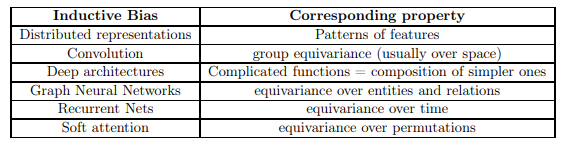

**Distributed representations: Patterns of features.** Приблизительно это означает следующее: объект описывается набором свойств, которые могут быть закодированы в виде вектора чисел (если честно, этот пункт не до конца понимаю).

**Convolution: group equivariance (usually over space).** Если сдвинуть входное изображение, то аналогичным образом сдвинется, но не изменится выход сверточного слоя (если не рассматривать краевые эффекты). Это значит, что элементы изображения обрабатываются одинаково независимо от их положения: свойство трансляционной эквивариантности. Трансляция = сдвиг, эквивариантность - свойство функции $f$ относительно класса функций $G$: $\forall g \in G: f(g(x)) = g(f(x))$ [[источник](https://distill.pub/2020/circuits/equivariance/)]. Если последним слоем будет глобальный пулинг, то получим инвариантность к сдвигам. Следует заметить, что сверточные сети все же не обладают естественными для изображений свойствами эквивариантности к поворотам и масштабированию, а так не умеют делать вывод о типе объекта по форме, игнорируя текстуру, а значит есть потенциал для улучшения.

**Deep architectures: Complicated functions = composition of simpler ones.** Сложные функции можно представить как композицию более простых, чему соответствуют нейронные сети с их последовательностью слоев.

**Graph Neural Networks: equivariance over entities and relations.** Свойство сущностей быть связанными с более отдаленными сущностями через своих соседей, и свойство связей иметь разные типы.

**Recurrent Nets: equivariance over time**. По аналогии со сверточными сетями: выход от смещенного во времени входа равен смещенному во времени выходу, поэтому обрабатывая последовательность на каждом шаге мы применяем одно и то же преобразование. Сверточные сети обеспечивают похожее свойство, поэтому иногда могут применяться вместо рекуррентных сетей. Также рекуррентные сети (LSTM, GRU) имеют память, то есть внутреннее состояние, элементы которого выборочно обновляются со временем. Это соответствует априорной гипотезе о том, что обрабатывая последовательность мы должны запоминать отдельные факты, чтобы в дальнейшем (возможно через длительный промежуток) сопоставить их с новыми фактами.

**Soft attention: equivariance over permutations.** Механизм внимания (в трансформерах и RNN с вниманием) работает инвариантно к перестановкам: входные данные фактически рассматриваются как неупорядоченное множество, для которого считается взвешенное среднее. Это может помочь в тех областях, где перестановки не портят данные (или портят частично), например в обработке естественного языка. Стоит также добавить, что в RNN с вниманием минимальная глубина сети (минимальное расстояние от входа к выходу, измеряемое количеством слоев) получается меньше, чем в обычной RNN. Известно, что менее глубокие сети требуют меньшего объема обучающих данных для генерализации, чем более глубокие.

Трансформеры перестановочно инвариантны и изначально не имеют представления о порядке элементов в последовательности. Positional encoding в трансформерах - это попытка найти компромисс между перестановочной инвариантностью с локальностью. Однако трансформеры изначально "не знают" как интерпретировать positional encoding. Возможно это одна из причин, по которой для обучения трансформеров обычно требуется очень много обучающих данных.

### Еще пара вопросов

А нельзя ли просто выбирать тот алгоритм, который показал наибольшую точность на кросс-валидации? Это хорошая идея, однако мы не можем опробовать все существующие алгоритмы со всеми возможными настройками: априорные гипотезы позволяют заранее отсеять проигрышные решения и, более того, придумать новые алгоритмы, которые хорошо решают поставленную задачу. Как замечено [в упомянутой статье]($Inductive Biases for Deep Learning of Higher-Level Cognition$),

> "It is sometimes not obvious how to turn an inductive bias into a machine learning method, this often being the core contribution of machine learning papers."

Там же замечено, что недостаток заложенной в алгоритм априорной информации (читай *регуляризации*) можно компенсировать большим объемом обучающих данных.

> "Interestingly, different inductive biases may be equivalent to more or less data (could be exponentially more data)"

И наконец, высокая точность при тестировании не защищает нас от проблемы сдвига данных и систематических ошибок в датасете (примеры см. в первом разделе).

### Резюме

В задачах машинного обучения следует принимать во внимание априорные гипотезы о данных, которые накладывают (строгие или нестрогие) ограничения на множество возможных решений. Такими гипотезами мы можем компенсировать нехватку обучающих данных.

Это означает, что мы должны перечислить предполагаемые свойства зависимости целевых данных от исходных, а затем проверить, заложены ли эти свойства в архитектуру модели (а также в типы признаков, методы обучения и отбора моделей). Это и есть регуляризация, то есть набор методов для повышения обобщающей способности. Такие гипотезы называются **inductive priors**.

Примером обучаемого алгоритма, в который не заложено никаких априорных гипотез, может служить "алгоритм-словарь", в точности запоминающий все примеры и ответы к ним, а на другие примеры дающий случайный ответ. Такой алгоритм не имеет способности к обобщению.

В статье мы рассмотрели различные примеры регуляризации. Строгие предпочтения описывают некоторые обязательные свойства модели, например для рекуррентных сетей - одинаковость преобразования на каждом шаге. Нестрогие предпочтения обычно означают добавление слагаемых к функции потерь, которые выражают степень соответствия модели желаемым свойствам, например L2-регуляризация весов.

В целом идея об использовании в машинном обучении априорных гипотез призвана изменить наше мышление. Не следует обучать ML-алгоритмы с мыслью: "это машинное обучение, а значит модель должна сама обучаться и сама находить зависимости в данных, а я лишь передам ей на вход все данные, какие у меня есть". Вместо этого стоит заранее строить гипотезы о свойствах исследуемой зависимости и соответствующим образом подбирать ML-модели и отбирать признаки. Тогда мы сможем эффективно обучаться на небольшом количестве данных, компенсируя нехватку данных заложенными в обучаемый алгоритм гипотезами о свойствах зависимости.